In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/Nifty50(inr).csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...,...
6032,2024-03-23,NaN,NaN,NaN,NaN,0
6033,2024-03-24,NaN,NaN,NaN,NaN,0
6034,2024-03-25,NaN,NaN,NaN,NaN,0
6035,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,328400


In [7]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...,...
4046,2024-03-20,21843.900391,21930.900391,21710.199219,21839.099609,312400
4047,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,353200
4048,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,388700
4049,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,328400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051 entries, 0 to 4050
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4051 non-null   datetime64[ns]
 1   Open    4051 non-null   float64       
 2   High    4051 non-null   float64       
 3   Low     4051 non-null   float64       
 4   Close   4051 non-null   float64       
 5   Volume  4051 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 190.0 KB


In [9]:
df.shape


(4051, 6)

In [10]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

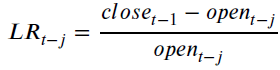

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [11]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-11-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-1c7c221

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,-0.005267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,0.011593,0.006141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,0.040020,0.053014,0.047339,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,0.002682,0.043360,0.056396,0.050703,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2024-03-20,21843.900391,21930.900391,21710.199219,21839.099609,312400,-0.005878,-0.007851,-0.011212,-0.007511,-0.027405,-0.012939,0.017852,0.091445,0.250728
4047,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,353200,-0.000220,-0.004891,-0.006867,-0.010231,-0.006526,-0.011770,0.016829,0.085014,0.253543
4048,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,388700,0.001003,0.007693,0.002985,0.000994,-0.002397,-0.010648,0.021744,0.092055,0.282706
4049,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,328400,0.007503,0.004859,0.011575,0.006849,0.004850,0.000688,0.050528,0.096289,0.287206


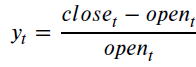

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [12]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005267
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,-0.005267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011593
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,0.011593,0.006141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040020
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,0.040020,0.053014,0.047339,NaN,NaN,NaN,NaN,NaN,NaN,0.002682
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,0.002682,0.043360,0.056396,0.050703,NaN,NaN,NaN,NaN,NaN,0.017799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2024-03-20,21843.900391,21930.900391,21710.199219,21839.099609,312400,-0.005878,-0.007851,-0.011212,-0.007511,-0.027405,-0.012939,0.017852,0.091445,0.250728,-0.000220
4047,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,353200,-0.000220,-0.004891,-0.006867,-0.010231,-0.006526,-0.011770,0.016829,0.085014,0.253543,0.001003
4048,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,388700,0.001003,0.007693,0.002985,0.000994,-0.002397,-0.010648,0.021744,0.092055,0.282706,0.007503
4049,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,328400,0.007503,0.004859,0.011575,0.006849,0.004850,0.000688,0.050528,0.096289,0.287206,0.002588


In [13]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2008-09-22,4248.950195,4303.250000,4202.399902,4223.049805,0,0.050596,0.059921,0.041830,0.042406,0.003143,-0.038710,-0.024338,-0.060765,-0.060463,-0.006096
253,2008-09-23,4223.899902,4224.700195,4117.899902,4126.899902,0,-0.006096,0.045102,0.054379,0.036382,0.036955,-0.014193,-0.011238,-0.068736,-0.060312,-0.022965
254,2008-09-24,4125.750000,4207.950195,4115.850098,4161.250000,0,-0.022965,-0.028725,0.021308,0.030373,0.012786,-0.044246,-0.014966,-0.098300,-0.093039,0.008604
255,2008-09-25,4162.149902,4172.600098,4077.500000,4110.549805,0,0.008604,-0.014832,-0.020640,0.029808,0.038949,-0.040125,-0.021481,-0.098672,-0.121144,-0.012397
256,2008-09-26,4108.750000,4110.700195,3970.350098,3985.250000,0,-0.012397,-0.003684,-0.026835,-0.032573,0.017261,-0.052181,-0.047447,-0.157450,-0.135158,-0.030058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2024-03-20,21843.900391,21930.900391,21710.199219,21839.099609,312400,-0.005878,-0.007851,-0.011212,-0.007511,-0.027405,-0.012939,0.017852,0.091445,0.250728,-0.000220
4047,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,353200,-0.000220,-0.004891,-0.006867,-0.010231,-0.006526,-0.011770,0.016829,0.085014,0.253543,0.001003
4048,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,388700,0.001003,0.007693,0.002985,0.000994,-0.002397,-0.010648,0.021744,0.092055,0.282706,0.007503
4049,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,328400,0.007503,0.004859,0.011575,0.006849,0.004850,0.000688,0.050528,0.096289,0.287206,0.002588


In [14]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [15]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (2659, 9)
y_train:  (2659,)
x_valid:  (569, 9)
y_valid:  (569,)
x_test:  (571, 9)
y_test:  (571,)


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [17]:
best_svr = grid_search.best_estimator_

In [18]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 0.1, 'epsilon': 0.001, 'gamma': 0.0001}


In [19]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [20]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 0.1, 'epsilon': 0.001, 'gamma': 0.0001}


In [21]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [22]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.011842595308093812
Validation RMSE (SVR):  0.011996018051027046
Test RMSE (SVR):  0.00690080983875501


In [23]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-23-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
2911,2019-08-16,11043.650391,11068.650391,10924.299805,11047.799805,470900,0.002377,-0.009875,-0.005276,0.011946,0.006507,-0.048915,-0.013501,0.005864,-0.024900,0.000376,-0.000734
2912,2019-08-19,11094.799805,11146.900391,11037.849609,11053.900391,369500,0.000376,0.004049,-0.008223,-0.003617,0.013634,-0.053377,-0.019011,-0.002046,-0.027465,-0.003686,-0.000734
2913,2019-08-20,11063.900391,11076.299805,10985.299805,11017.000000,444700,-0.003686,0.000928,0.004603,-0.007675,-0.003066,-0.053248,-0.051322,0.002758,-0.024274,-0.004239,-0.000732
2914,2019-08-21,11018.150391,11034.200195,10906.650391,10918.700195,557900,-0.004239,-0.007012,-0.002413,0.001250,-0.010988,-0.052542,-0.071365,0.007877,-0.024854,-0.009026,-0.000731
2915,2019-08-22,10905.299805,10908.250000,10718.299805,10741.349609,668200,-0.009026,-0.013124,-0.015872,-0.011314,-0.007684,-0.041618,-0.069002,0.003585,-0.042345,-0.015034,-0.000732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2021-11-30,17051.150391,17324.650391,16931.400391,16983.199219,498000,-0.000109,-0.016426,-0.020862,-0.028268,-0.013182,-0.062334,0.024720,0.105877,0.330946,-0.003985,-0.000747
3476,2021-12-01,17104.400391,17213.050781,17064.250000,17166.900391,295500,-0.003985,-0.004257,-0.020506,-0.024924,-0.032299,-0.047656,0.012360,0.100108,0.310402,0.003654,-0.000746
3477,2021-12-02,17183.199219,17420.349609,17149.300781,17401.650391,279900,0.003654,0.006788,0.006514,-0.009911,-0.014377,-0.034654,0.012946,0.098355,0.320267,0.012713,-0.000744
3478,2021-12-03,17424.900391,17489.800781,17180.800781,17196.699219,292500,0.012713,0.017379,0.020556,0.020278,0.003628,-0.031676,0.012572,0.121215,0.325335,-0.013096,-0.000741


In [24]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-24-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
2911,2019-08-16,11043.650391,11068.650391,10924.299805,11047.799805,470900,0.002377,-0.009875,-0.005276,0.011946,0.006507,-0.048915,-0.013501,0.005864,-0.024900,0.000376,-0.000734,11035.540369
2912,2019-08-19,11094.799805,11146.900391,11037.849609,11053.900391,369500,0.000376,0.004049,-0.008223,-0.003617,0.013634,-0.053377,-0.019011,-0.002046,-0.027465,-0.003686,-0.000734,11086.654336
2913,2019-08-20,11063.900391,11076.299805,10985.299805,11017.000000,444700,-0.003686,0.000928,0.004603,-0.007675,-0.003066,-0.053248,-0.051322,0.002758,-0.024274,-0.004239,-0.000732,11055.797706
2914,2019-08-21,11018.150391,11034.200195,10906.650391,10918.700195,557900,-0.004239,-0.007012,-0.002413,0.001250,-0.010988,-0.052542,-0.071365,0.007877,-0.024854,-0.009026,-0.000731,11010.091674
2915,2019-08-22,10905.299805,10908.250000,10718.299805,10741.349609,668200,-0.009026,-0.013124,-0.015872,-0.011314,-0.007684,-0.041618,-0.069002,0.003585,-0.042345,-0.015034,-0.000732,10897.313109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2021-11-30,17051.150391,17324.650391,16931.400391,16983.199219,498000,-0.000109,-0.016426,-0.020862,-0.028268,-0.013182,-0.062334,0.024720,0.105877,0.330946,-0.003985,-0.000747,17038.419830
3476,2021-12-01,17104.400391,17213.050781,17064.250000,17166.900391,295500,-0.003985,-0.004257,-0.020506,-0.024924,-0.032299,-0.047656,0.012360,0.100108,0.310402,0.003654,-0.000746,17091.647324
3477,2021-12-02,17183.199219,17420.349609,17149.300781,17401.650391,279900,0.003654,0.006788,0.006514,-0.009911,-0.014377,-0.034654,0.012946,0.098355,0.320267,0.012713,-0.000744,17170.421387
3478,2021-12-03,17424.900391,17489.800781,17180.800781,17196.699219,292500,0.012713,0.017379,0.020556,0.020278,0.003628,-0.031676,0.012572,0.121215,0.325335,-0.013096,-0.000741,17411.983679


In [ ]:
pip install eli5

In [27]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0000 ± 0.0001,LR_63
0.0000 ± 0.0000,LR_21
0.0000 ± 0.0000,LR_252
-0.0000 ± 0.0000,LR_1
-0.0000 ± 0.0000,LR_126
-0.0000 ± 0.0000,LR_4
-0.0000 ± 0.0000,LR_2
-0.0000 ± 0.0000,LR_5
-0.0000 ± 0.0000,LR_3


In [28]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_63', 'LR_21', 'LR_252', 'LR_1', 'LR_126', 'LR_4', 'LR_2', 'LR_5', 'LR_3']


In [29]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
2911,2019-08-16,11043.650391,11068.650391,10924.299805,11047.799805,470900,0.002377,-0.009875,-0.005276,0.011946,0.006507,-0.048915,-0.013501,0.005864,-0.024900,0.000376
2912,2019-08-19,11094.799805,11146.900391,11037.849609,11053.900391,369500,0.000376,0.004049,-0.008223,-0.003617,0.013634,-0.053377,-0.019011,-0.002046,-0.027465,-0.003686
2913,2019-08-20,11063.900391,11076.299805,10985.299805,11017.000000,444700,-0.003686,0.000928,0.004603,-0.007675,-0.003066,-0.053248,-0.051322,0.002758,-0.024274,-0.004239
2914,2019-08-21,11018.150391,11034.200195,10906.650391,10918.700195,557900,-0.004239,-0.007012,-0.002413,0.001250,-0.010988,-0.052542,-0.071365,0.007877,-0.024854,-0.009026
2915,2019-08-22,10905.299805,10908.250000,10718.299805,10741.349609,668200,-0.009026,-0.013124,-0.015872,-0.011314,-0.007684,-0.041618,-0.069002,0.003585,-0.042345,-0.015034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,2021-11-30,17051.150391,17324.650391,16931.400391,16983.199219,498000,-0.000109,-0.016426,-0.020862,-0.028268,-0.013182,-0.062334,0.024720,0.105877,0.330946,-0.003985
3476,2021-12-01,17104.400391,17213.050781,17064.250000,17166.900391,295500,-0.003985,-0.004257,-0.020506,-0.024924,-0.032299,-0.047656,0.012360,0.100108,0.310402,0.003654
3477,2021-12-02,17183.199219,17420.349609,17149.300781,17401.650391,279900,0.003654,0.006788,0.006514,-0.009911,-0.014377,-0.034654,0.012946,0.098355,0.320267,0.012713
3478,2021-12-03,17424.900391,17489.800781,17180.800781,17196.699219,292500,0.012713,0.017379,0.020556,0.020278,0.003628,-0.031676,0.012572,0.121215,0.325335,-0.013096


In [30]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [32]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [33]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.012000784681504338


In [34]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

-4.7666304772917e-06

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [36]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): 0.012007064166823544, ('LR_1', 'LR_2', 'LR_4', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): 0.012000676820157829, ('LR_1', 'LR_4', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): 0.012000671315226516, ('LR_1', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): 0.012001367721813656, ('LR_1', 'LR_21', 'LR_63', 'LR_252'): 0.012004824772781439, ('LR_21', 'LR_63', 'LR_252'): 0.012002300941087665, ('LR_21', 'LR_63'): 0.012006175562701933, ('LR_63',): 0.012002792812407416}


In [37]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): -1.1046115796498057e-05, ('LR_1', 'LR_2', 'LR_4', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): -4.658769130782767e-06, ('LR_1', 'LR_4', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): -4.653264199469889e-06, ('LR_1', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): -5.349670786610264e-06, ('LR_1', 'LR_21', 'LR_63', 'LR_252'): -8.806721754392455e-06, ('LR_21', 'LR_63', 'LR_252'): -6.282890060618773e-06, ('LR_21', 'LR_63'): -1.015751167488671e-05, ('LR_63',): -6.774761380369532e-06}


In [38]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_1', 'LR_4', 'LR_21', 'LR_63', 'LR_126', 'LR_252')
Maximum Loss Difference: -4.653264199469889e-06


In [39]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-39-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [41]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.006891882003066339


In [42]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-42-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
3480,2021-12-07,17044.099609,17251.650391,16987.750000,17176.699219,254100,-0.017247,-0.029421,-0.015768,-0.011234,-0.008146,-0.057028,-0.020287,0.076356,0.299738,0.007780,-0.000743,17031.438056
3481,2021-12-08,17315.250000,17484.599609,17308.949219,17469.750000,257800,0.007780,-0.001880,-0.014244,-0.000378,0.004227,-0.047865,-0.012796,0.092311,0.314993,0.008923,-0.000742,17302.401664
3482,2021-12-09,17524.400391,17543.250000,17379.599609,17516.849609,237200,0.008923,0.024973,0.015149,0.002574,0.016676,-0.033985,0.003919,0.107510,0.331394,-0.000431,-0.000741,17511.409212
3483,2021-12-10,17476.050781,17534.349609,17405.250000,17511.300781,204500,-0.000431,0.011643,0.027737,0.017886,0.005277,-0.025404,0.008120,0.111031,0.325498,0.002017,-0.000741,17463.098415
3484,2021-12-13,17619.099609,17639.500000,17355.949219,17368.250000,256600,0.002017,-0.000748,0.011322,0.027411,0.017563,-0.025387,0.011463,0.115931,0.328889,-0.014237,-0.000742,17606.031685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2024-03-20,21843.900391,21930.900391,21710.199219,21839.099609,312400,-0.005878,-0.007851,-0.011212,-0.007511,-0.027405,-0.012939,0.017852,0.091445,0.250728,-0.000220,-0.000744,21827.649087
4047,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,353200,-0.000220,-0.004891,-0.006867,-0.010231,-0.006526,-0.011770,0.016829,0.085014,0.253543,0.001003,-0.000743,21973.554788
4048,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,388700,0.001003,0.007693,0.002985,0.000994,-0.002397,-0.010648,0.021744,0.092055,0.282706,0.007503,-0.000743,21915.902166
4049,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,328400,0.007503,0.004859,0.011575,0.006849,0.004850,0.000688,0.050528,0.096289,0.287206,0.002588,-0.000744,21931.564443


In [43]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-43-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-44-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
3480,2021-12-07,17044.099609,17251.650391,16987.750000,17176.699219,254100,-0.017247,-0.029421,-0.015768,-0.011234,-0.008146,-0.057028,-0.020287,0.076356,0.299738,0.007780,-0.000743,17031.438056
3481,2021-12-08,17315.250000,17484.599609,17308.949219,17469.750000,257800,0.007780,-0.001880,-0.014244,-0.000378,0.004227,-0.047865,-0.012796,0.092311,0.314993,0.008923,-0.000742,17302.401664
3482,2021-12-09,17524.400391,17543.250000,17379.599609,17516.849609,237200,0.008923,0.024973,0.015149,0.002574,0.016676,-0.033985,0.003919,0.107510,0.331394,-0.000431,-0.000741,17511.409212
3483,2021-12-10,17476.050781,17534.349609,17405.250000,17511.300781,204500,-0.000431,0.011643,0.027737,0.017886,0.005277,-0.025404,0.008120,0.111031,0.325498,0.002017,-0.000741,17463.098415
3484,2021-12-13,17619.099609,17639.500000,17355.949219,17368.250000,256600,0.002017,-0.000748,0.011322,0.027411,0.017563,-0.025387,0.011463,0.115931,0.328889,-0.014237,-0.000742,17606.031685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2024-03-20,21843.900391,21930.900391,21710.199219,21839.099609,312400,-0.005878,-0.007851,-0.011212,-0.007511,-0.027405,-0.012939,0.017852,0.091445,0.250728,-0.000220,-0.000744,21827.649087
4047,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,353200,-0.000220,-0.004891,-0.006867,-0.010231,-0.006526,-0.011770,0.016829,0.085014,0.253543,0.001003,-0.000743,21973.554788
4048,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,388700,0.001003,0.007693,0.002985,0.000994,-0.002397,-0.010648,0.021744,0.092055,0.282706,0.007503,-0.000743,21915.902166
4049,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,328400,0.007503,0.004859,0.011575,0.006849,0.004850,0.000688,0.050528,0.096289,0.287206,0.002588,-0.000744,21931.564443


In [45]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

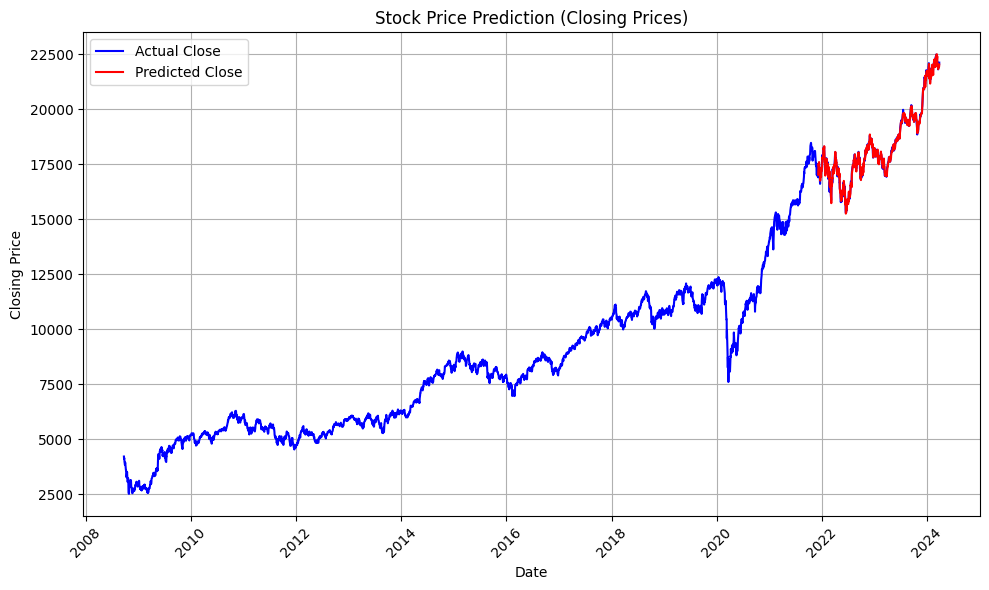

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Datasets to carry out the rest of the study (15-20 Datasets)

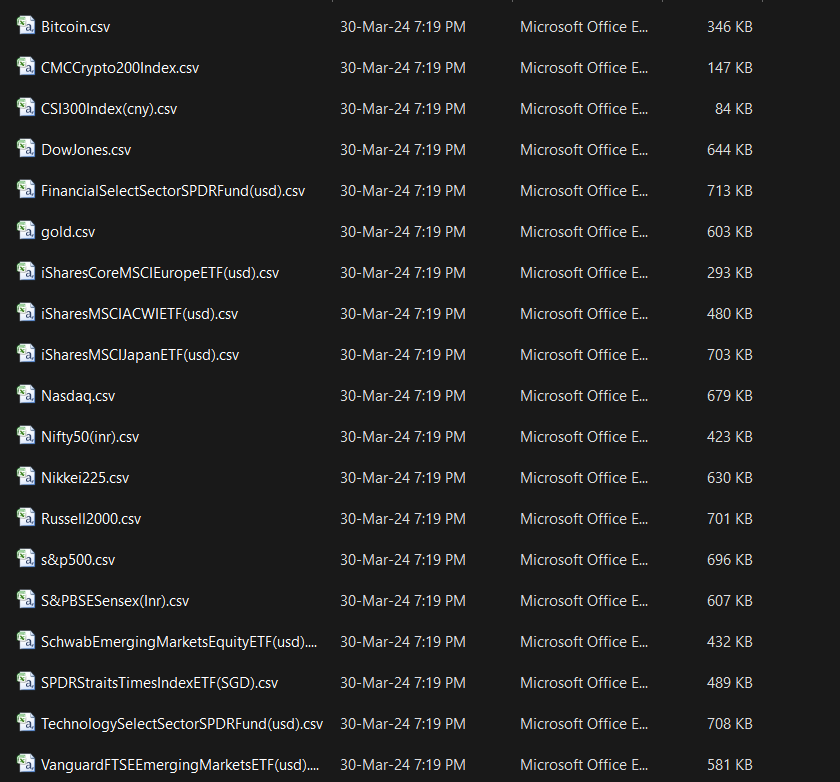

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Train RMSE (GBDT): 0.011091091636960676
Validation RMSE (GBDT): 0.012485624916836108
Test RMSE (GBDT): 0.006891981529580016


In [49]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (XGBoost): 0.011433874861207956
Validation RMSE (XGBoost): 0.011830120806156863
Test RMSE (XGBoost): 0.006891616459509982


In [50]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Train RMSE (Random Forest): 0.00941128916787192
Validation RMSE (Random Forest): 0.012113786105091558
Test RMSE (Random Forest): 0.0069098445848701385
